**Stock Maeket Prediction using LSTM**

In [39]:
import pandas as pd
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-10,288.170013,289.809998,286.940002,289.160004,286.391663,24687800
1,2022-08-11,290.850006,291.209991,286.510010,287.019989,284.272156,20065900
2,2022-08-12,288.480011,291.910004,286.940002,291.910004,289.115356,22619700
3,2022-08-15,291.000000,294.179993,290.109985,293.470001,290.660431,18085700
4,2022-08-16,291.989990,294.040009,290.420013,292.709991,289.907684,18102900
...,...,...,...,...,...,...,...
247,2023-08-04,331.880005,335.140015,327.239990,327.779999,327.779999,23727700
248,2023-08-07,328.369995,331.109985,327.519989,330.109985,330.109985,17741500
249,2023-08-08,326.959991,328.750000,323.000000,326.049988,326.049988,22327600
250,2023-08-09,326.470001,327.109985,321.049988,322.230011,322.230011,22373300


In [40]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2022-08-10,289.160004
1,2022-08-11,287.019989
2,2022-08-12,291.910004
3,2022-08-15,293.470001
4,2022-08-16,292.709991
...,...,...
247,2023-08-04,327.779999
248,2023-08-07,330.109985
249,2023-08-08,326.049988
250,2023-08-09,322.230011


In [41]:
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('2022-03-19')
datetime_object

datetime.datetime(2022, 3, 19, 0, 0)

In [42]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-42-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-08-10
1     2022-08-11
2     2022-08-12
3     2022-08-15
4     2022-08-16
         ...    
247   2023-08-04
248   2023-08-07
249   2023-08-08
250   2023-08-09
251   2023-08-10
Name: Date, Length: 252, dtype: datetime64[ns]

In [43]:
df.index = df.pop('Date')
df

,Close
Date,
2022-08-10,289.160004
2022-08-11,287.019989
2022-08-12,291.910004
2022-08-15,293.470001
2022-08-16,292.709991
...,...
2023-08-04,327.779999
2023-08-07,330.109985
2023-08-08,326.049988


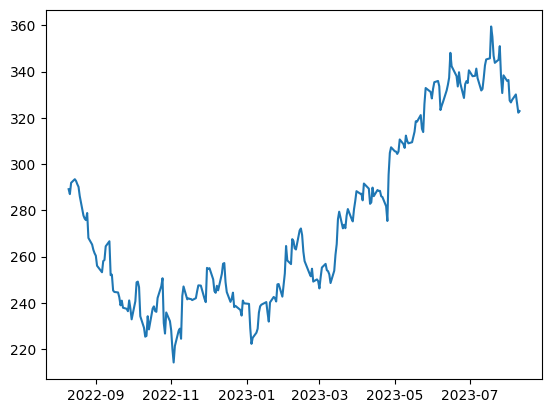

In [44]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [45]:
import numpy as np
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2023-01-10'
windowed_df = df_to_windowed_df(df,'2023-01-10', '2023-08-10', n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-10,222.309998,224.929993,227.119995,228.850006
1,2023-01-11,224.929993,227.119995,228.850006,235.770004
2,2023-01-12,227.119995,228.850006,235.770004,238.509995
3,2023-01-13,228.850006,235.770004,238.509995,239.229996
4,2023-01-17,235.770004,238.509995,239.229996,240.350006
...,...,...,...,...,...
142,2023-08-04,336.339996,327.500000,326.660004,327.779999
143,2023-08-07,327.500000,326.660004,327.779999,330.109985
144,2023-08-08,326.660004,327.779999,330.109985,326.049988
145,2023-08-09,327.779999,330.109985,326.049988,322.230011


In [46]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((147,), (147, 3, 1), (147,))

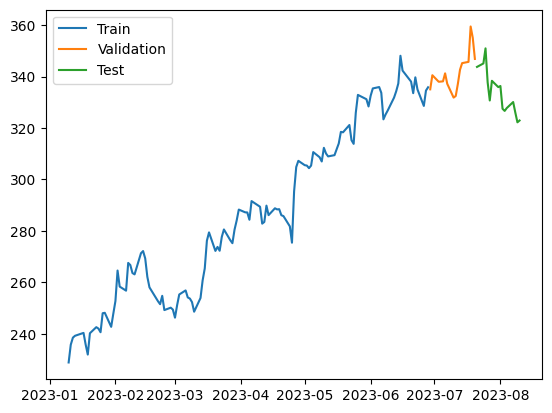

In [47]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
4/4 [==============================] - 4s 336ms/step - loss: 82589.7891 - mean_absolute_error: 285.5351 - val_loss: 116651.2500 - val_mean_absolute_error: 341.4598
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 82456.0938 - mean_absolute_error: 285.3013 - val_loss: 116478.2969 - val_mean_absolute_error: 341.2065
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 82313.7109 - mean_absolute_error: 285.0519 - val_loss: 116327.5234 - val_mean_absolute_error: 340.9854
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 82189.9922 - mean_absolute_error: 284.8334 - val_loss: 116181.3828 - val_mean_absolute_error: 340.7711
Epoch 5/100
4/4 [==============================] - 0s 30ms/step - loss: 82059.5234 - mean_absolute_error: 284.6043 - val_loss: 116012.0391 - val_mean_absolute_error: 340.5225
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 81904.6484 - mean_absolute_error: 284.3316 - val_los

4/4 [==============================] - 0s 4ms/step


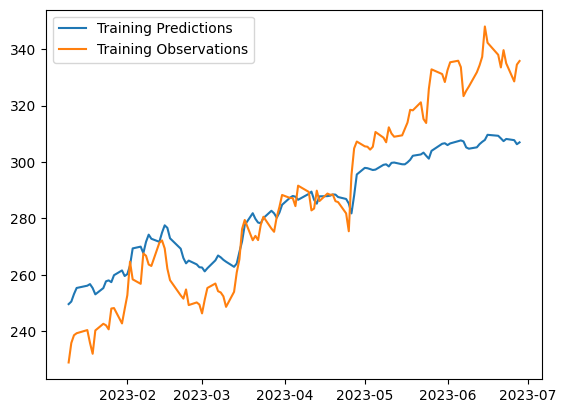

In [49]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 32ms/step


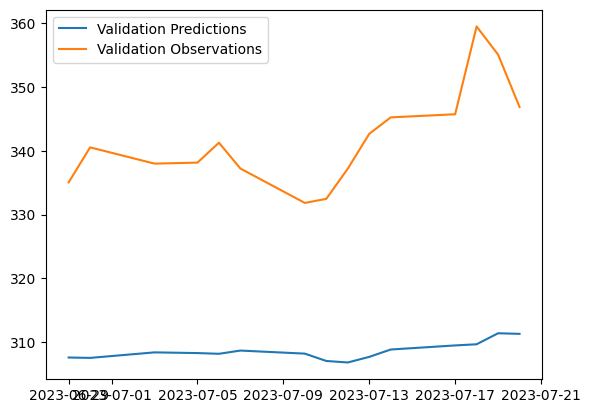

In [50]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 23ms/step


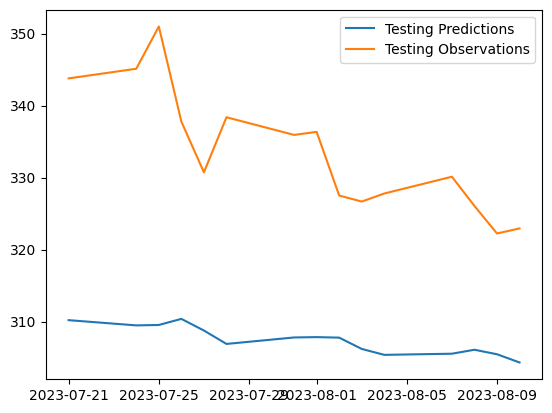

In [51]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

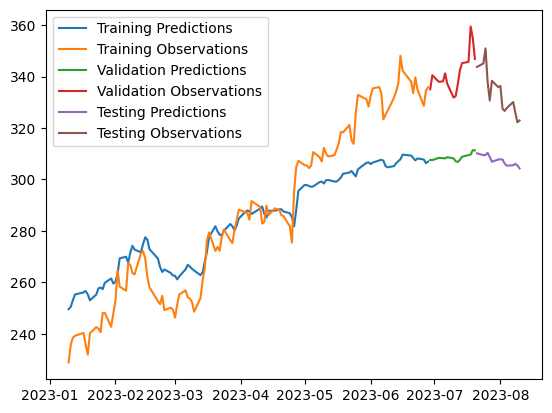

In [52]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 'Training Observations','Validation Predictions', 'Validation Observations',
'Testing Predictions', 'Testing Observations'])

In [53]:
from copy import deepcopy
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 25ms/step


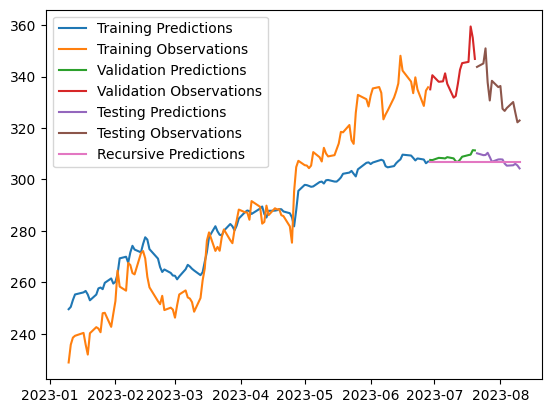

In [54]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 'Training Observations','Validation Predictions',
            'Validation Observations', 'Testing Predictions', 'Testing Observations','Recursive Predictions'])